In [3]:
import numpy as nm 
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Admission_Predict.csv") 

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
X = df[['GRE Score','TOEFL Score']]

In [8]:
X

,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103
...,...,...
294,316,101
295,317,100
296,310,107
297,320,120


In [9]:
from sklearn.cluster import KMeans 

In [10]:
wcss_list= []

In [11]:
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_) 

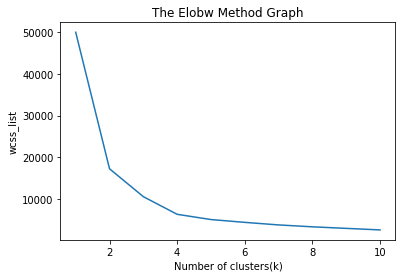

In [12]:
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

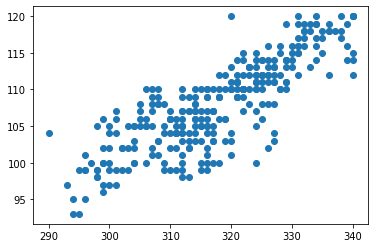

In [13]:
plt.scatter(X['GRE Score'],X['TOEFL Score'])

In [14]:
model = KMeans(n_clusters = 4)
model.fit(X)

KMeans(n_clusters=4)

In [15]:
model.cluster_centers_

array([[299.59574468, 100.5106383 ],
       [312.33027523, 104.80733945],
       [333.87037037, 116.59259259],
       [323.28089888, 110.50561798]])

In [16]:
cluster_number = model.predict(X)

In [17]:
len(cluster_number)

299

In [18]:
len(X)

299

In [23]:
c0 = X[cluster_number==0]
c1 = X[cluster_number==1]
c2 = X[cluster_number==2]
c3 = X[cluster_number==3]

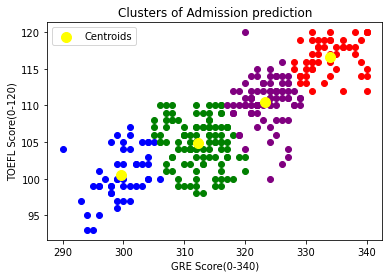

In [25]:
plt.scatter(c0['GRE Score'], c0['TOEFL Score'],c = 'blue')   
plt.scatter(c1['GRE Score'], c1['TOEFL Score'],c = 'green')   
plt.scatter(c2['GRE Score'], c2['TOEFL Score'],c = 'red')  
plt.scatter(c3['GRE Score'], c3['TOEFL Score'],c = 'purple') 
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Admission prediction')
plt.xlabel('GRE Score(0-340)')
plt.ylabel('TOEFL Score(0-120)')
plt.legend()
plt.show()